*Think Linear Algebra* is not for sale yet, but if you would like to support this project, you can [buy me a coffee](https://buymeacoffee.com/allendowney).

# Title



[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ThinkLinearAlgebra/blob/main/nb/track.ipynb).

In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkLinearAlgebra/raw/main/utils.py")

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import decorate

<IPython.core.display.Javascript object>

## Section



In [4]:
import pint

ureg = pint.UnitRegistry()

pace = 8 * ureg.minute / ureg.mile
pace

<Quantity(8.0, 'minute / mile')>

<IPython.core.display.Javascript object>

In [5]:
speed_mph = (1 / pace).to(ureg.mile / ureg.hour)
speed_mph

<Quantity(7.5, 'mile / hour')>

<IPython.core.display.Javascript object>

In [6]:
speed_mps = (1 / pace).to(ureg.meter / ureg.second)
speed_mps

<Quantity(3.3528, 'meter / second')>

<IPython.core.display.Javascript object>

In [7]:
straight = 84.39
circumference = 400 - (2 * straight)
circumference / 2

115.61

<IPython.core.display.Javascript object>

In [8]:
radius = circumference / 2 / np.pi
radius

36.799805941708044

<IPython.core.display.Javascript object>

In [9]:
from scipy.interpolate import interp1d

key_t = np.array([0, 2, 40])
key_v = np.array([0, 3.8, 3.2])

velocity_linear = interp1d(key_t, key_v, kind="linear", fill_value="extrapolate")

<IPython.core.display.Javascript object>

In [10]:
ts = np.arange(41)
vs = velocity_linear(ts)
np.mean(vs)

np.float64(3.3756097560975604)

<IPython.core.display.Javascript object>

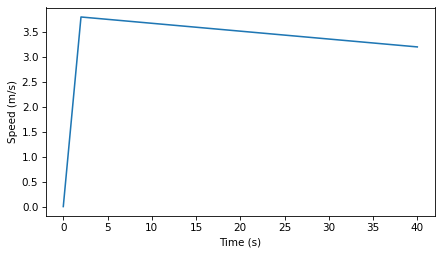

<IPython.core.display.Javascript object>

In [11]:
plt.plot(ts, vs)
decorate(xlabel="Time (s)", ylabel="Speed (m/s)")

In [12]:
ds = np.cumsum(vs)

<IPython.core.display.Javascript object>

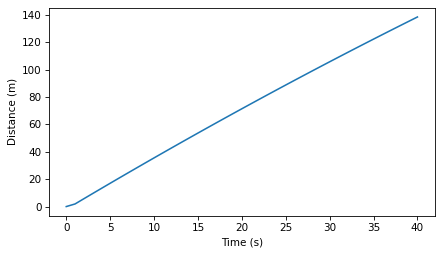

<IPython.core.display.Javascript object>

In [13]:
plt.plot(ts, ds)
decorate(xlabel="Time (s)", ylabel="Distance (m)")

In [14]:
ds[-1], circumference / 2

(np.float64(138.40000000000003), 115.61)

<IPython.core.display.Javascript object>

In [15]:
mask = ds < circumference / 2
ts = ts[mask]
ds = ds[mask]

<IPython.core.display.Javascript object>

In [16]:
thetas = ds / radius
thetas[-1]
thetas.shape

(33,)

<IPython.core.display.Javascript object>

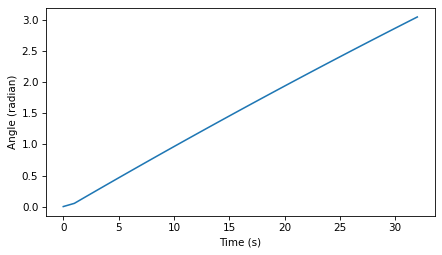

<IPython.core.display.Javascript object>

In [17]:
plt.plot(ts, thetas)
decorate(xlabel="Time (s)", ylabel="Angle (radian)")

In [18]:
from utils import polar_to_cartesian

xs, ys = polar_to_cartesian(radius, thetas)

<IPython.core.display.Javascript object>

In [21]:
position = np.column_stack([xs, ys])
position.shape

(33, 2)

<IPython.core.display.Javascript object>

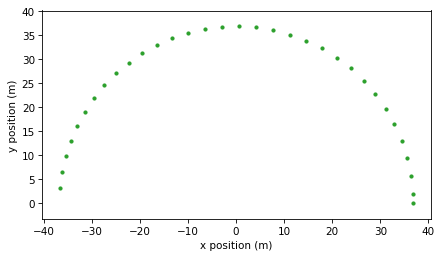

<IPython.core.display.Javascript object>

In [22]:
for vector in position:
    x, y = vector
    plt.plot(x, y, ".", color="C2")

plt.axis("equal")
decorate(xlabel="x position (m)", ylabel="y position (m)")

In [23]:
from utils import scatter

scatter(position, color="C2")
plt.axis("equal")
decorate(xlabel="x position (m)", ylabel="y position (m)")

<IPython.core.display.Javascript object>

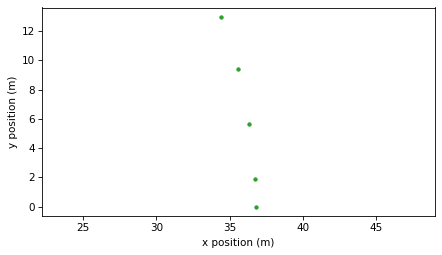

<IPython.core.display.Javascript object>

In [25]:
scatter(position, end=5, s=10, color="C2")
plt.axis("equal")
decorate(xlabel="x position (m)", ylabel="y position (m)")

In [26]:
from utils import quiver

<IPython.core.display.Javascript object>

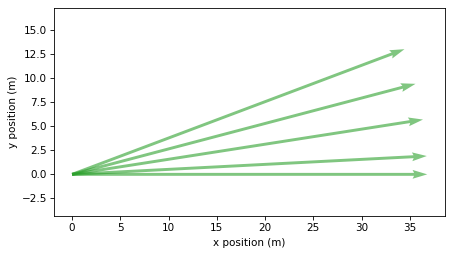

<IPython.core.display.Javascript object>

In [27]:
quiver(position, end=5, color="C2")
plt.axis("equal")
decorate(xlabel="x position (m)", ylabel="y position (m)")

In [28]:
dts = np.diff(ts)
velocity = np.diff(position, axis=0) / dts[:, None]
velocity.shape

(32, 2)

<IPython.core.display.Javascript object>

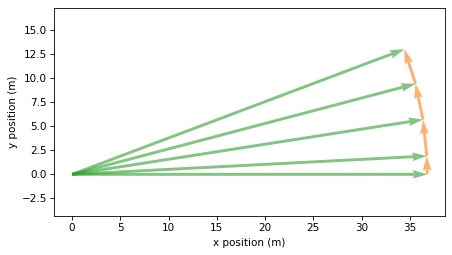

<IPython.core.display.Javascript object>

In [29]:
quiver(position, end=5, color="C2")
quiver(velocity, position, end=4, color="C1")
plt.axis("equal")
decorate(xlabel="x position (m)", ylabel="y position (m)")

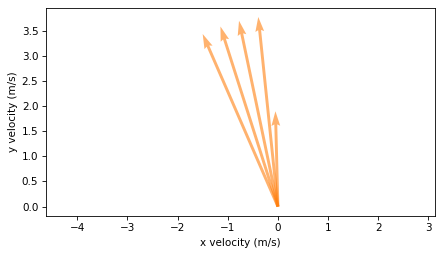

<IPython.core.display.Javascript object>

In [30]:
quiver(velocity, end=5, color="C1")
plt.axis("equal")
decorate(xlabel="x velocity (m/s)", ylabel="y velocity (m/s)")

In [31]:
from numpy.linalg import norm

speeds = [norm(vector) for vector in velocity]

<IPython.core.display.Javascript object>

In [32]:
speeds = norm(velocity, axis=1)
speeds.shape

(32,)

<IPython.core.display.Javascript object>

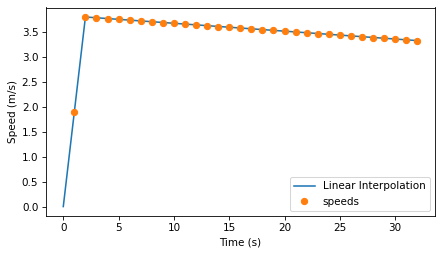

<IPython.core.display.Javascript object>

In [33]:
vs = velocity_linear(ts)
plt.plot(ts, vs, label="Linear Interpolation")
plt.plot(ts[:-1] + 1, speeds, "o", label="speeds")
decorate(xlabel="Time (s)", ylabel="Speed (m/s)")

In [34]:
acceleration = np.diff(velocity, axis=0) / dts[1:, None]

<IPython.core.display.Javascript object>

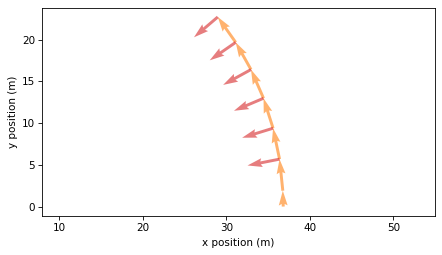

<IPython.core.display.Javascript object>

In [35]:
end = 7
quiver(velocity, position, end=end, color="C1")
quiver(acceleration * 10, position[1:], start=1, end=end, color="C3")
plt.axis("equal")
decorate(xlabel="x position (m)", ylabel="y position (m)")

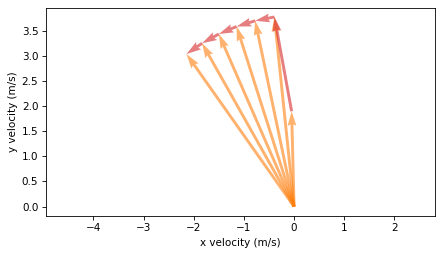

<IPython.core.display.Javascript object>

In [36]:
quiver(velocity, end=7, color="C1")
quiver(acceleration, velocity, end=6, color="C3")
plt.axis("equal")
decorate(xlabel="x velocity (m/s)", ylabel="y velocity (m/s)")

In [37]:
A = position[3]
C = position[4]
B = C - A

<IPython.core.display.Javascript object>

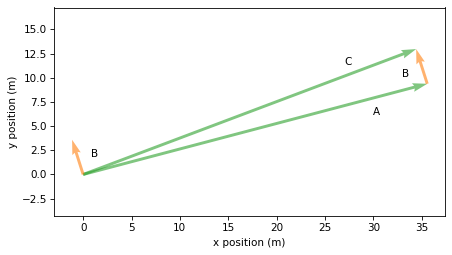

<IPython.core.display.Javascript object>

In [38]:
quiver([A, C], color="C2")
quiver([B], color="C1")
quiver([B], [A], color="C1")

plt.axis("equal")
plt.text(30, 6.2, "A")
plt.text(27, 11.3, "C")
plt.text(0.8, 1.8, "B")
plt.text(33, 10.1, "B")
decorate(xlabel="x position (m)", ylabel="y position (m)")

TODO: Multiply by dts

In [39]:
A = position[0]
C = position[-1]
D = np.sum(velocity, axis=0)

<IPython.core.display.Javascript object>

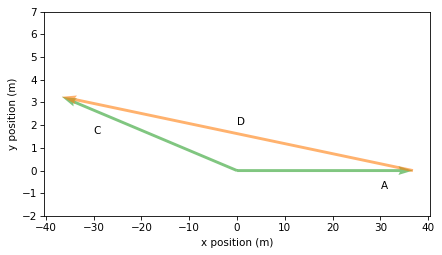

<IPython.core.display.Javascript object>

In [40]:
quiver([A, C], color="C2")
quiver([D], [A], color="C1")

plt.text(30, -0.8, "A")
plt.text(-30, 1.6, "C")
plt.text(0, 2, "D")
decorate(xlabel="x position (m)", ylabel="y position (m)", ylim=[-2, 7])

[Think Linear Algebra](https://allendowney.github.io/ThinkLinearAlgebra/index.html)

Copyright 2025 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)